# Exercise 1

Work on this before the next lecture on 22 March. We will talk about questions, comments, and solutions during the exercise after the second lecture.

Please do form study groups! When you do, make sure you can explain everything in your own words, do not simply copy&paste from others.

The solutions to a lot of these problems can probably be found with Google. Please don't. You will not learn a lot by copy&pasting from the internet.

If you want to get credit/examination on this course please upload your work to **your GitHub repository** for this course **before** the next lecture starts and post a link to your repository [in this thread](https://github.com/wildtreetech/advanced-computing-2018/issues/2). If you worked on things together with others please add their names to the notebook so we can see who formed groups.


## Objective

There are two objectives for this set of exercises:

* get you started using python, scikit-learn, matplotlib, and GitHub. You will be using them a lot during the course, so make sure you get a good foundation to build on.

* working through the steps of opening a new dataset, plotting the data, fitting a model to it, evaluating your model, and deciding on model complexity.

## Question 0

Install python, scikit-learn (v0.19), matplotlib, jupyter and git.

Instructions for doing so: https://github.com/wildtreetech/advanced-comp-2018/blob/master/install.md

Documentation and guides for the various tools:

* [jupyter quickstart](http://jupyter.readthedocs.io/en/latest/content-quickstart.html)
* [try jupyter without installing anything](https://try.jupyter.org/)
* [matplotlib homepage](http://matplotlib.org/)
* [matplotlib gallery](http://matplotlib.org/gallery.html)
* [scikit-learn homepage](http://scikit-learn.org/stable/)
* [scikit-learn examples](http://scikit-learn.org/stable/auto_examples/index.html)
* [scikit-learn documentation](http://scikit-learn.org/stable/documentation.html)
* [try git online without installing anything](https://try.github.io/levels/1/challenges/1)


### GitHub and git

* [Create a GitHub account]() for yourself or use one you already have.
* Follow the guide on [creating a new repository](https://help.github.com/articles/create-a-repo/). Name the repository "advanced-comp-2018".

Read up on `git clone`, `git pull`, `git push`, `git add` and `git commit`. Once you master these five commands you should be good for this course. There is a whole universe of complex things that `git` can do for you, don't worry about them for now. Once you feel comfortable with the basics you can always step it up later.

---

These are some useful default imports for plotting and [`numpy`](http://www.numpy.org/)

In [4]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

---

## Question 1

In the lecture we used the nearest neighbour classifier to classify points from a toy dataset into either "red" or "blue" classes. We investigated how the performance changes as a function of model complexity and what this means for the performance of our classifier on unseen data. 

* plot your dataset
* split your dataset into a training and testing set. Comment on how you decided to split your data.
* evaluate the performance of the classifier on your training dataset.
* evaluate the performance of the classifier on your testing dataset.
* repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment
  on what you see. Is there a "best" way to split your data?
* comment on why the two performance estimates agree or disagree.
* plot the accuracy of the classifier as a function of `n_neighbors`.
* comment on the similarities and differences between the performance on the testing and training dataset.
* is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?

Use `make_blobs(n_samples=400, centers=23, random_state=42)` to create a simple dataset and use the `KNeighborsClassifier` classifier to answer the above questions.

In [5]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

### plot your dataset

Text(0,0.5,u'X2')

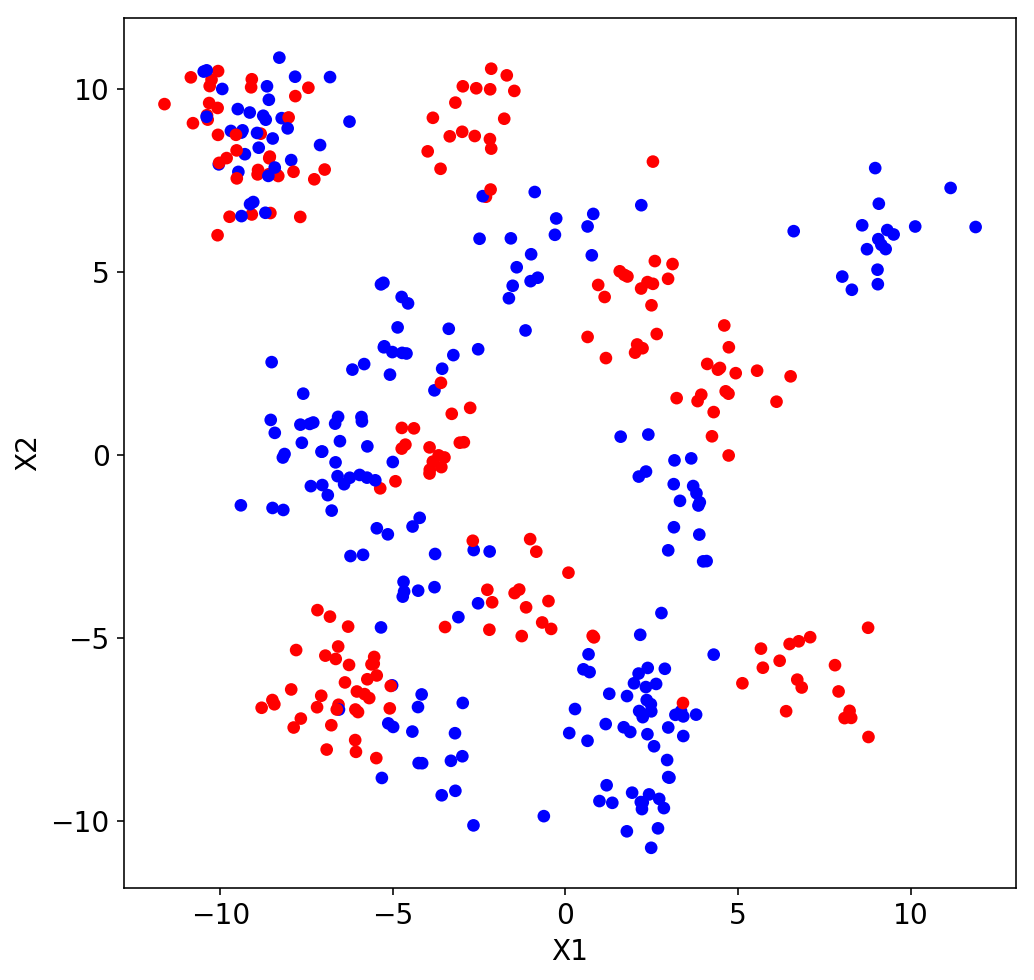

In [6]:
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("X1")
plt.ylabel("X2")

### split your dataset into a training and testing set. Comment on how you decided to split your data.

For the moment we just chose a 30% test set and 70% train set randomly and "intuitively" to train on more data. But we will indeed see in next questions the impact of the train/test ratio.

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)

### evaluate the performance of the classifier on your training dataset.
### evaluate the performance of the classifier on your testing dataset.

We already take into consideration the number of neighbors (hyperparameter) that can vary.


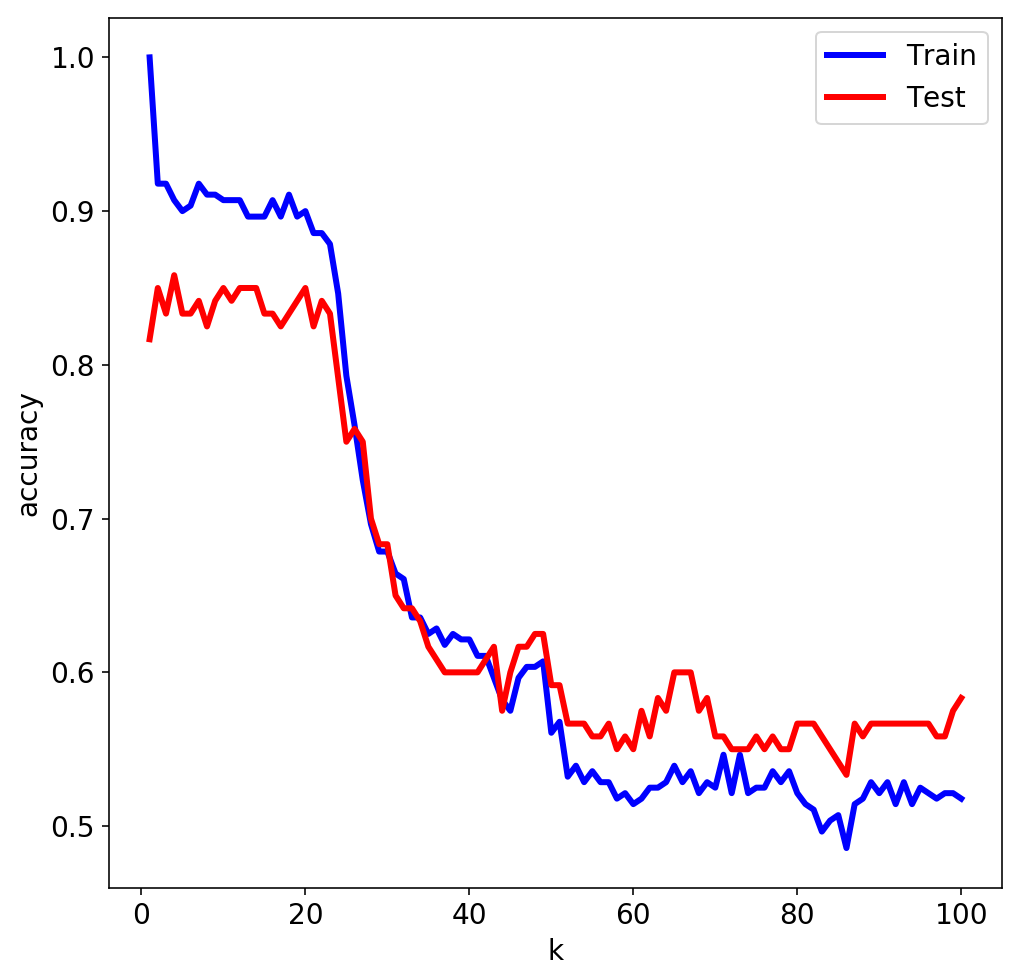

In [9]:
train_scores = []
test_scores = []

k_range = np.arange(1, 101, 1)
for k in k_range:
    clf = KNeighborsClassifier(n_neighbors=k)
    clf.fit(X_train, y_train)
    train_scores.append(clf.score(X_train, y_train))
    test_scores.append(clf.score(X_test, y_test))
    
plt.plot(k_range, train_scores, label='Train', c='b', lw=3)
plt.plot(k_range, test_scores,label='Test', c='r', lw=3)
plt.xlabel('k')
plt.ylabel('accuracy')
plt.legend(loc='best')

### repeat the above two steps for varying splits (10-90, 20-80, 30-70, ...) and comment on what you see. Is there a "best" way to split your data? 

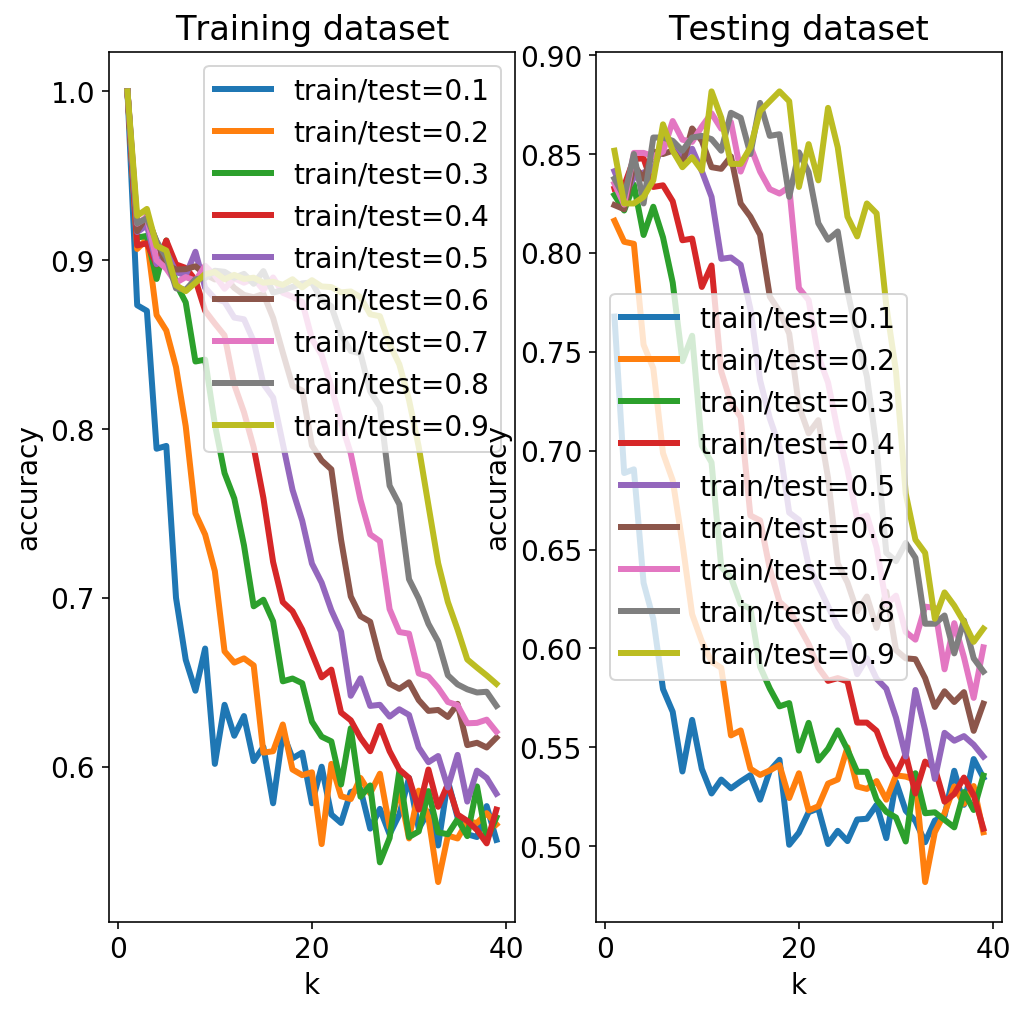

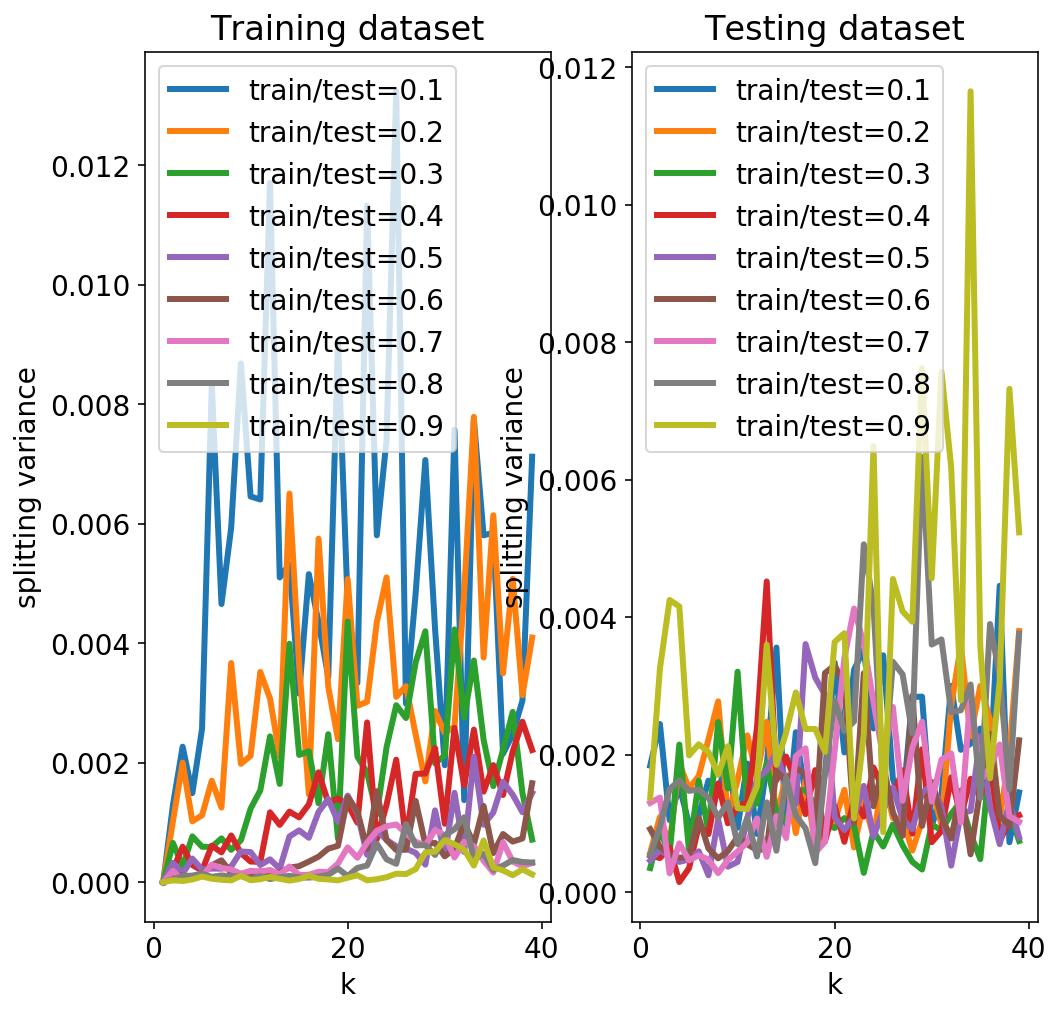

In [26]:
ratio_range = np.arange(0.1, 1.0, 0.1)
k_range = np.arange(1, 40, 1)

X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

for ratio in ratio_range:
    accuracies_train = []
    accuracies_test = []
    variances_train = []
    variances_test = []
    for k in k_range:
    # since train_test_split shuffles the data before splitting, we average over some data splittings
        train_scores = []
        test_scores = []
        for i in np.arange(15):
            X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=ratio)
            clf = KNeighborsClassifier(n_neighbors=k)
            clf.fit(X_train, y_train)
            train_scores.append(clf.score(X_train, y_train))
            test_scores.append(clf.score(X_test, y_test))
        
        accuracies_test.append(np.array(test_scores).mean(axis=0))
        accuracies_train.append(np.array(train_scores).mean(axis=0))
        variances_test.append(np.array(test_scores).var(axis=0))
        variances_train.append(np.array(train_scores).var(axis=0))
    
    plt.figure(1)
    plt.subplot(121)
    plt.plot(k_range, accuracies_train, label='train/test={}'.format(ratio), lw=3)
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.title('Training dataset')
    
    plt.subplot(122)
    plt.plot(k_range, accuracies_test , label='train/test={}'.format(ratio), lw=3)
    plt.xlabel('k')
    plt.ylabel('accuracy')
    plt.legend(loc='best')
    plt.title('Testing dataset')
    
    plt.figure(2)
    plt.subplot(121)
    plt.plot(k_range, variances_train, label='train/test={}'.format(ratio), lw=3)
    plt.xlabel('k')
    plt.ylabel('splitting variance')
    plt.legend(loc='best')
    plt.title('Training dataset')
    
    plt.subplot(122)
    plt.plot(k_range, variances_test , label='train/test={}'.format(ratio), lw=3)
    plt.xlabel('k')
    plt.ylabel('splitting variance')
    plt.legend(loc='best')
    plt.title('Testing dataset')

The accuracy on training/testing datasets depends a lot on the way of splitting the data. For a small training set both accuracies are low (underfitting). When increasing the training set size, both accuracies tend to improve. Depending on the number of neighbours considered, the "best" way to split the data would be for size ratios of training data over test data larger than 50%. Indeed, depending on the k value, the splitting with large training sets gives better accuracy on average. On the other hand, one must be careful as the variance of the accuracy increases as we increase the splitting ratio, due to the random splitting.

### comment on why the two performance estimates agree or disagree.
For a fixed reasonable k value (looking only at the training/testing ratio), we may say that the more accurate we get on the training data, the more accurate we also get on the testing data (note it fluctuates a bit depending on k), even though the test accuracy does not overcome the training accuracy. However, the more training data we have, the less testing data remain which biases the testing procedure.

### plot the accuracy of the classifier as a function of n_neighbors.

This has already been considered above.

### comment on the similarities and differences between the performance on the testing and training dataset.
Both behaviours are similar in the sense that the accuracy decreases when k is increasing. For k=1, the accuracy is perfect on the training set while it is not optimal on the test set. The optimal accuracy appears at intermediat k values for the testing set. Finally, at large k, both accuracies rapidly drop down as the complexity decreases and the model tends to underfit the training data by interpolating too large neighborhoods.

### is a KNeighbor Classifier with 4 or 10 neighbors more complicated?
As seen during the lecture, the complexity of the classifier goes like 1/k, thus the KNeighbor classifier is more complicated for 4 neighbors.


### find the best setting of n_neighbors for this dataset. Why is this the best setting?
In order to find the best setting, we do not longer look for a unique splitting of the dataset but rather use the cross validation approach seen in the lecture to reduce the high variance coming from a single splitting as we saw previously. Moreover, to be sure we have a balanced representation of the labels in different folds, we use the StratifiedKFold splitting method. According to that, the best n_neighbors is 14 for the considered dataset. As the cross validation is really similar to the previous statistics over the splitting we have done, we can see that the result is in accordance with the previous plots.

In [30]:
from sklearn.model_selection import cross_val_score

X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))

neighbors = [i+1 for i in np.arange(29)]

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

cross_val_scores = []
for i in neighbors:
    knn = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(knn, X_train, y_train, cv=15)
    cross_val_scores.append(np.mean(scores))

print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]

print("best n_neighbors: {}".format(best_n_neighbors))

knn = KNeighborsClassifier(n_neighbors=best_n_neighbors)
knn.fit(X_train, y_train)
print("test-set score: {:.3f}".format(knn.score(X_test, y_test)))

best cross-validation score: 0.840
best n_neighbors: 14
test-set score: 0.880


---

## Question 2

This is a regression problem. It mostly follows the setup of the classification problem so you should be able to reuse some of your work.

* plot your dataset
* fit a kNN regressor with varying number of `n_neighbors` and compare each regressors predictions to the location of the training and testing points. 
* plot the mean squared error of the classifier as a function of `n_neighbors` for both training and testing datasets.
* comment on the similarities and differences between the performance on the testing and training dataset.
* find the best setting of `n_neighbors` for this dataset.
* why is this the best setting?
* can you explain why the mean square error on the training dataset plateaus between ~`n_neihgors`=5 to 15 at the value that it does?

Use `make_regression()` to create the dataset and use `KNeighborsRegressor` to answer the above questions. Take a look at scikit-learn's [`metrics`](http://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) module to compute the mean squared error.

In [32]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

### plot your dataset

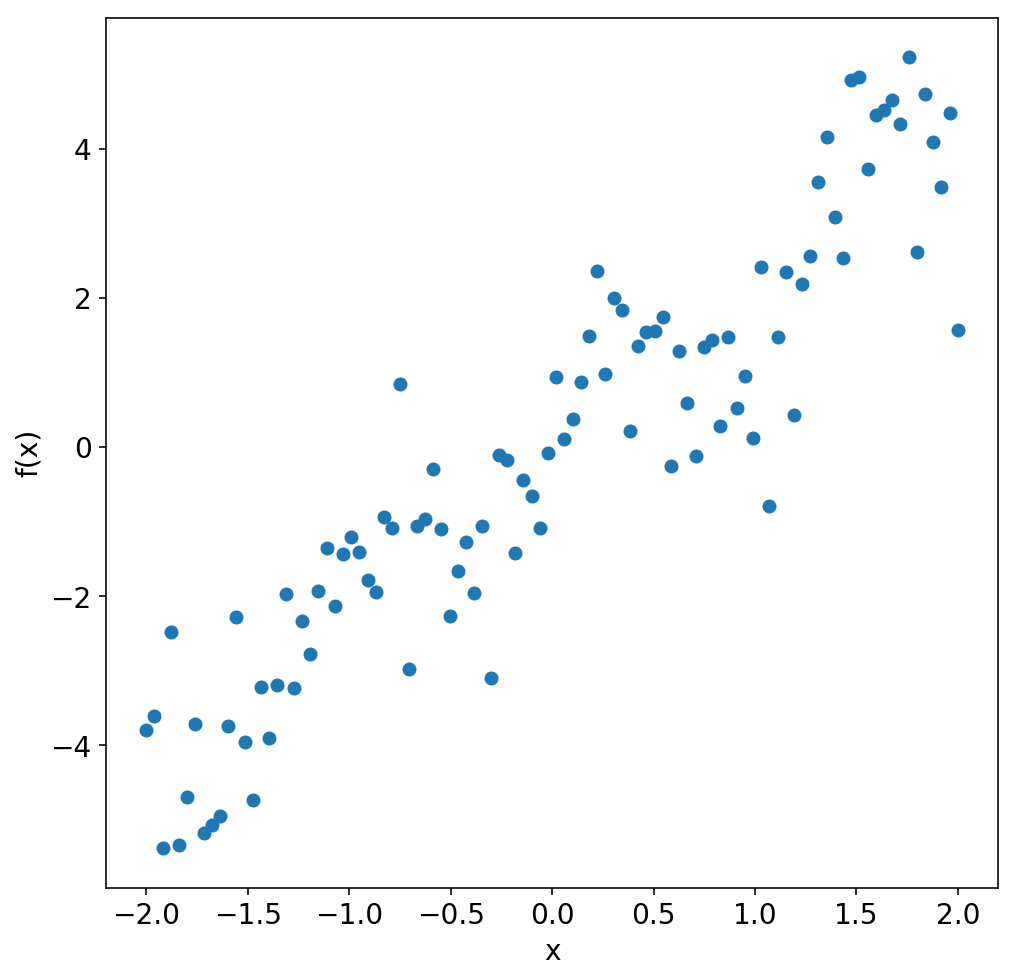

In [33]:
X, y = make_regression()
plt.plot(X, y, 'o', label='true f(x)')
plt.xlabel('x')
plt.ylabel("f(x)");

### fit a kNN regressor with varying number of `n_neighbors`. 

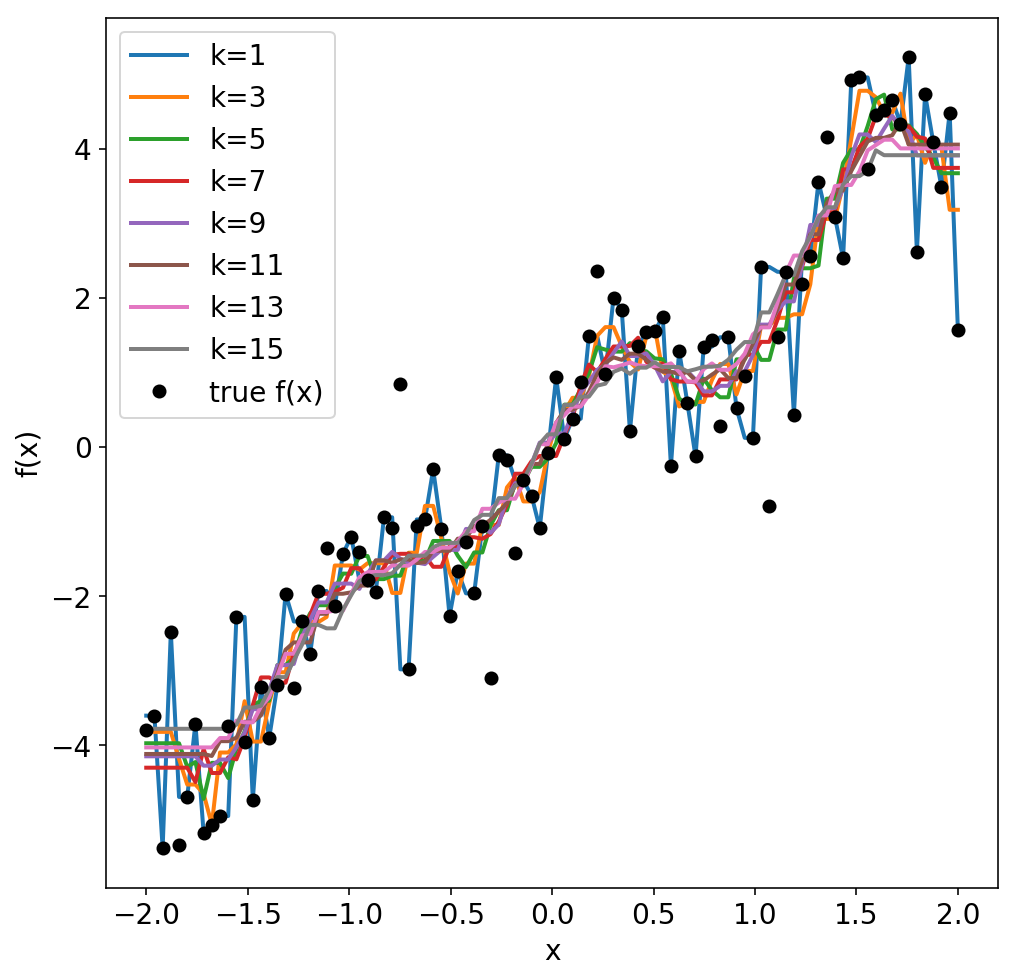

In [69]:
from sklearn.neighbors import KNeighborsRegressor

# we will keep a 0.25 random splitting for the testing set in this exercise
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
line = np.linspace(-2, 2, 100).reshape(-1, 1)

n_nbrs = [2*i+1 for i in np.arange(8)]
for n in n_nbrs:
    rgr = KNeighborsRegressor(n_neighbors=n)
    rgr.fit(X_train, y_train)
    plt.plot(line, rgr.predict(line), label='k={}'.format(n), lw=2)
    
plt.plot(X, y, 'o', label='true f(x)', c='k')
plt.xlabel('x')
plt.ylabel("f(x)");
plt.legend(loc='best')


###  and compare each regressors predictions to the location of the training and testing points.

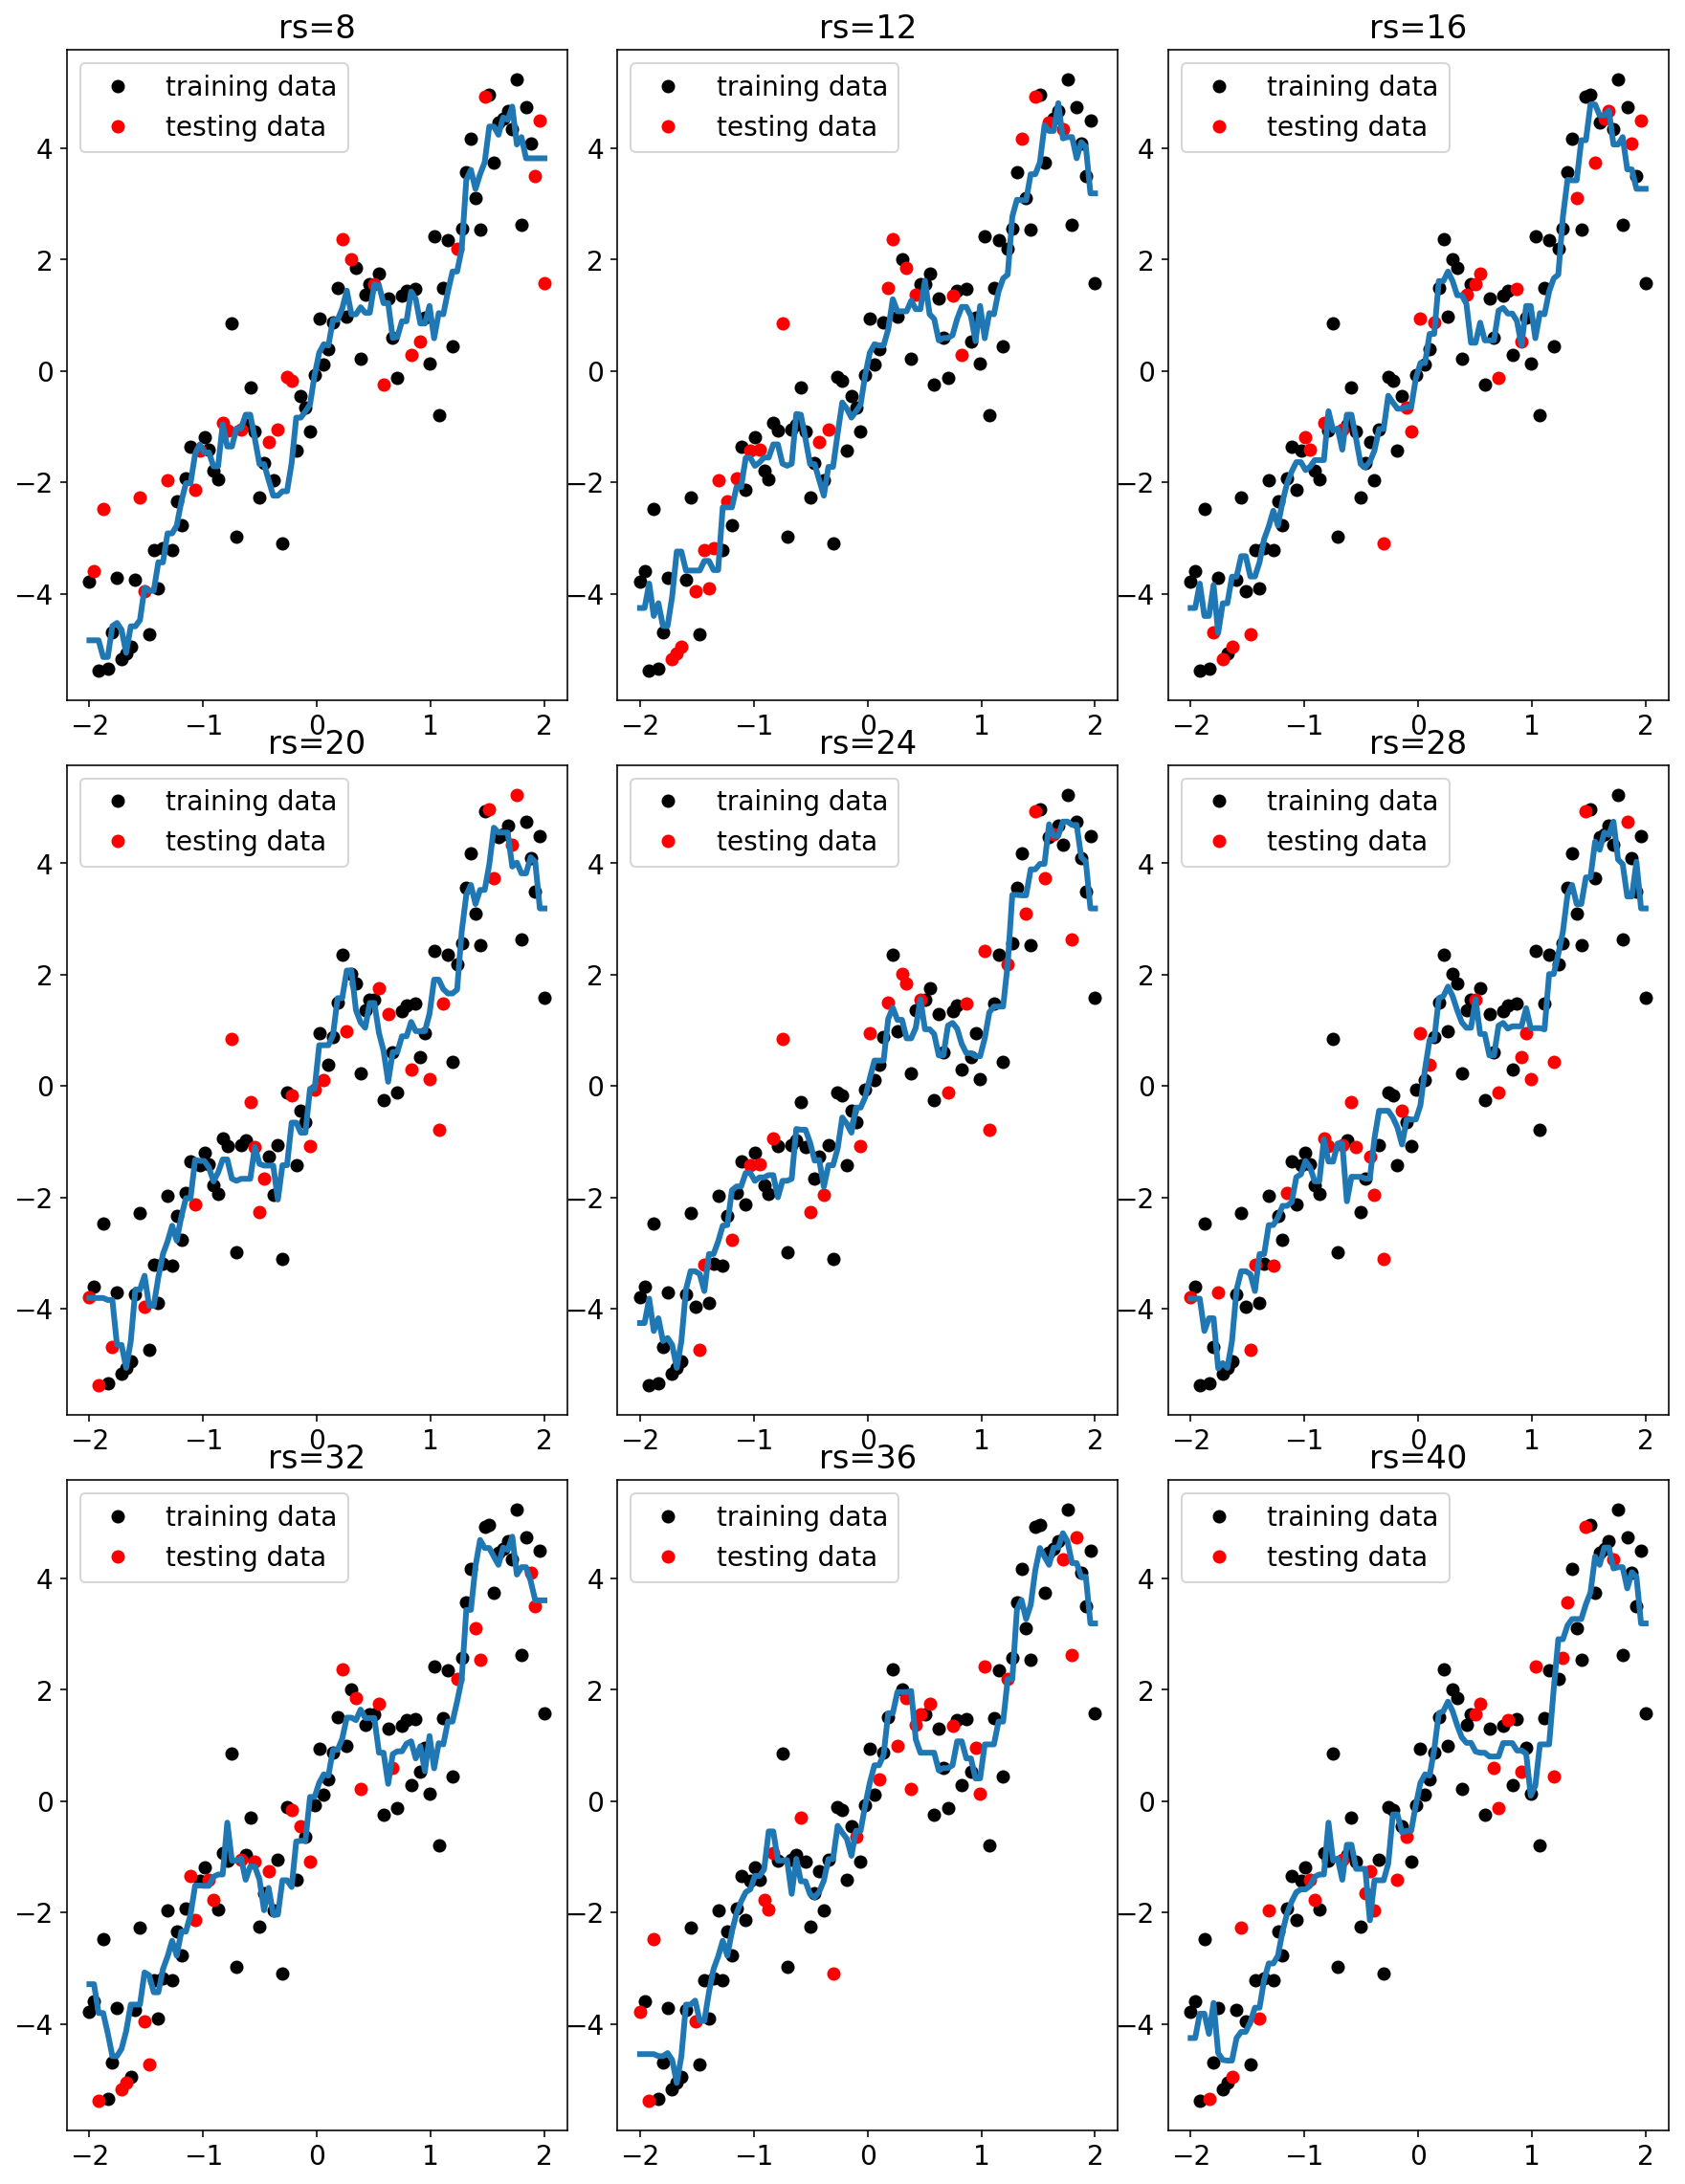

In [75]:
# for that we keep n_neighbors = 3

rs_values = [4*(i+2) for i in np.arange(9)]

fig, axs = plt.subplots(3,3, figsize=(15, 20), facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = 0.1, wspace=0.1)
axs = axs.ravel()

for i,rs in enumerate(rs_values):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=rs)
    rgr = KNeighborsRegressor(n_neighbors=3)
    rgr.fit(X_train, y_train)
    axs[i].plot(X_train, y_train, 'o', label='training data', c='k')
    axs[i].plot(X_test, y_test, 'o', label='testing data', c='r')
    axs[i].plot(line, rgr.predict(line), lw=3)
    #plt.xlabel('x')
    #plt.ylabel("f(x)");
    axs[i].set_title('rs={}'.format(rs))
    axs[i].legend(loc='best')

### plot the mean squared error of the classifier as a function of `n_neighbors` for both training and testing datasets.


[0.0, 0.4106402365566133, 0.51827554119601893, 0.63196820352429062, 0.65575233168250846, 0.63074771321842904, 0.67573738946101936, 0.66917327012324346, 0.62717632438588866, 0.66128052488619404, 0.66242228145363125, 0.68230312853130881, 0.70153461040301091, 0.72730861785034784, 0.74177037148661551, 0.7726930444195188, 0.79988479012144575, 0.83857636104493682, 0.87671794619912968, 0.94581714072150358, 1.0110702632870625, 1.0568309605681592, 1.1370487141546219, 1.1951622710322103, 1.2812049326898531, 1.3560265889634548, 1.4376995889470152, 1.4694699181716886, 1.5350571857263251]


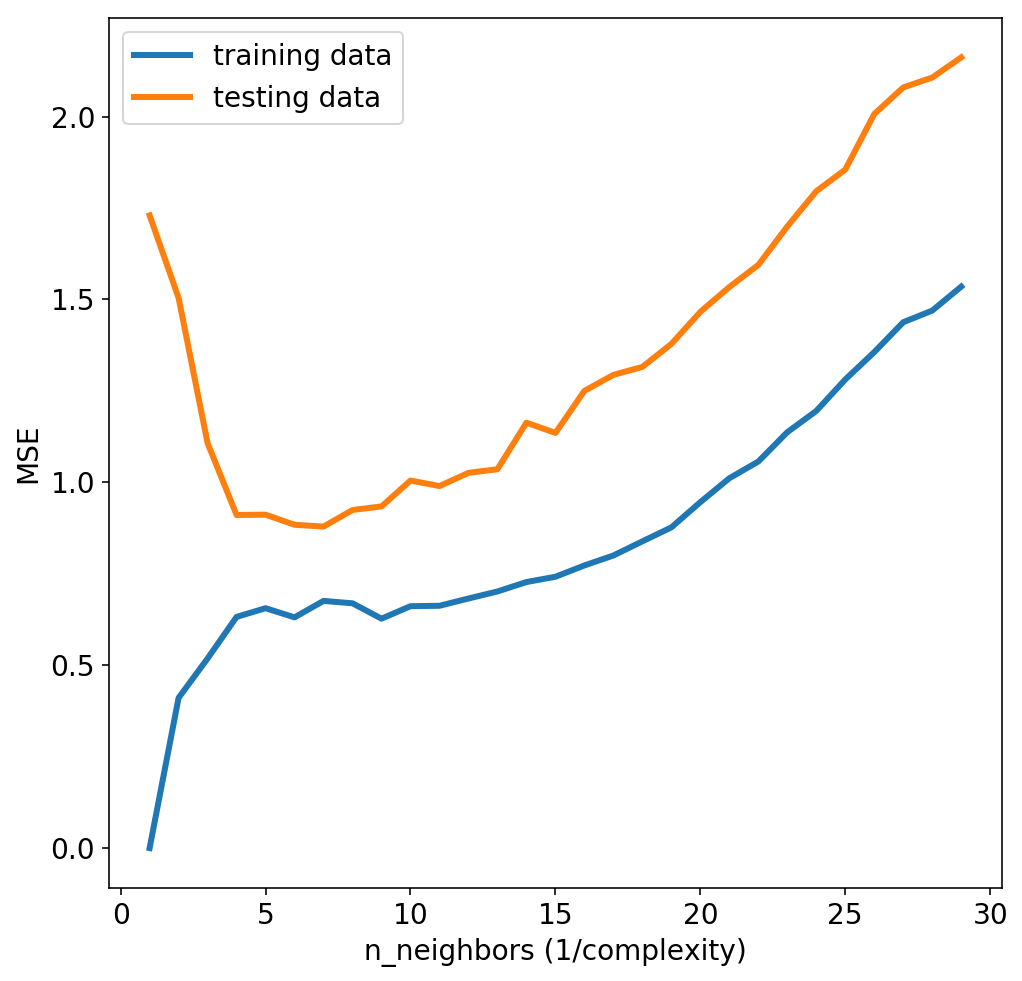

In [107]:
# here we keep the seed rs=42 to distinguish between training and testing datasets
from sklearn.metrics import mean_squared_error

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
n_nbrs = np.arange(29)+1
mse_train = []
mse_test = []
for n in n_nbrs:
    rgr = KNeighborsRegressor(n_neighbors=n)
    rgr.fit(X_train, y_train)
    y_train_pred = rgr.predict(X_train)
    mse_train.append(mean_squared_error(y_train, y_train_pred))
    y_test_pred = rgr.predict(X_test)
    mse_test.append(mean_squared_error(y_test, y_test_pred))
    
plt.plot(n_nbrs, mse_train, label='training data', lw=3)
print(mse_train)
plt.plot(n_nbrs, mse_test, label='testing data', lw=3)
plt.xlabel('n_neighbors (1/complexity)')
plt.ylabel("MSE");
plt.legend(loc='best')

### comment on the similarities and differences between the performance on the testing and training dataset.
At low k values (high comlexity), the error on the training dataset is vanishing since we are overfitting. This leads to a larger error on the testing data. Then, at large k values (lower complexity), the error on the training data logically increases since we interpolate on more neighbours. In this limit, too short information is also retained in order the model to accurately predict on the test data. The ideal point for prediction based on the test data is in the middle of the range.

### find the best setting of `n_neighbors` for this dataset. why is this the best setting?
Again, we choose the cross validation approach to find the best setting of n_neighbors like in the previous exercise. Here the stratified technique is irrelevant since we do not have different classes/groups of data. 


In [106]:
neighbors = [i+1 for i in np.arange(29)]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

cross_val_scores = []
for i in neighbors:
    rgr = KNeighborsRegressor(n_neighbors=i)
    scores = cross_val_score(rgr, X_train, y_train, cv=5)
    cross_val_scores.append(np.mean(scores))

print("best cross-validation score: {:.3f}".format(np.max(cross_val_scores)))
best_n_neighbors = neighbors[np.argmax(cross_val_scores)]

print("best n_neighbors: {}".format(best_n_neighbors))

rgr = KNeighborsRegressor(n_neighbors=best_n_neighbors)
rgr.fit(X_train, y_train)
print("test-set score: {:.3f}".format(rgr.score(X_test, y_test)))

best cross-validation score: 0.852
best n_neighbors: 7
test-set score: 0.870


### can you explain why the mean square error on the training dataset plateaus between ~`n_neihgors`=5 to 15 at the value that it does?
This range of n_neighbors contains the optimal k value, that is when the model parameters describe at best the underlying model generating the data. It is thus also the range where the prediction error on the test data is the smaller. In this region where we fit the model at best on the training data, we cannot expect to be better than the underlying model, that is to say, even in case of a "perfect" fit, there is still the inner noise coming from the data itself (a remaining unbeatable variance). In this case the noise level is equal to 0.8 and around the "best" k value, the mean square error on the training data thus plateaus near 0.8² = 0.64 (actually one can show that this plateau is in fact a bit higher than the noise variance, bias-variance tradeoff).

---

## Question 3

Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside a circle" problem. Think about what method you could use to increase the complexity of a logistic regression model. Visualise the classification accuracy as a function of the model complexity.

Use `make_circles(n_samples=400, factor=.3, noise=.1)` to create a simple dataset and use the `LogisticRegression` classifier to answer the above question.

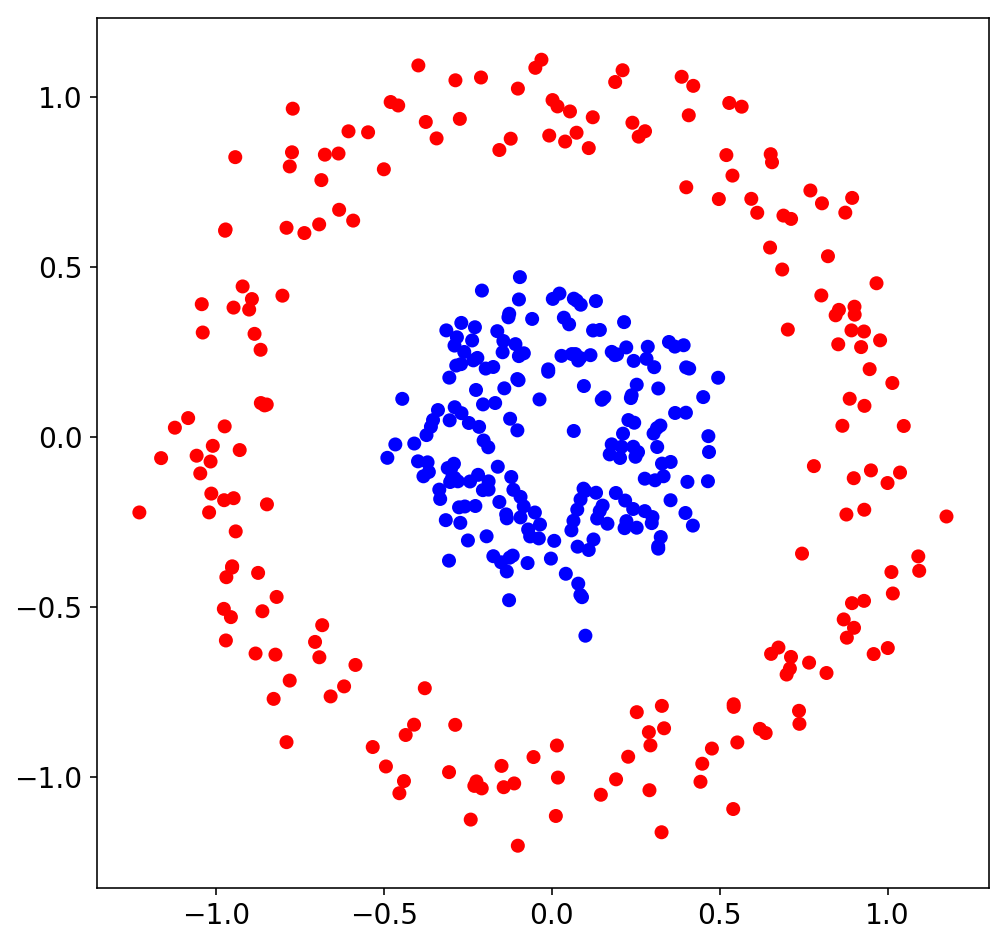

In [113]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)

### Logistic regression. Use a more complex linear model to create a two class classifier for the "circle inside a circle" problem.

0.392857142857
0.341666666667


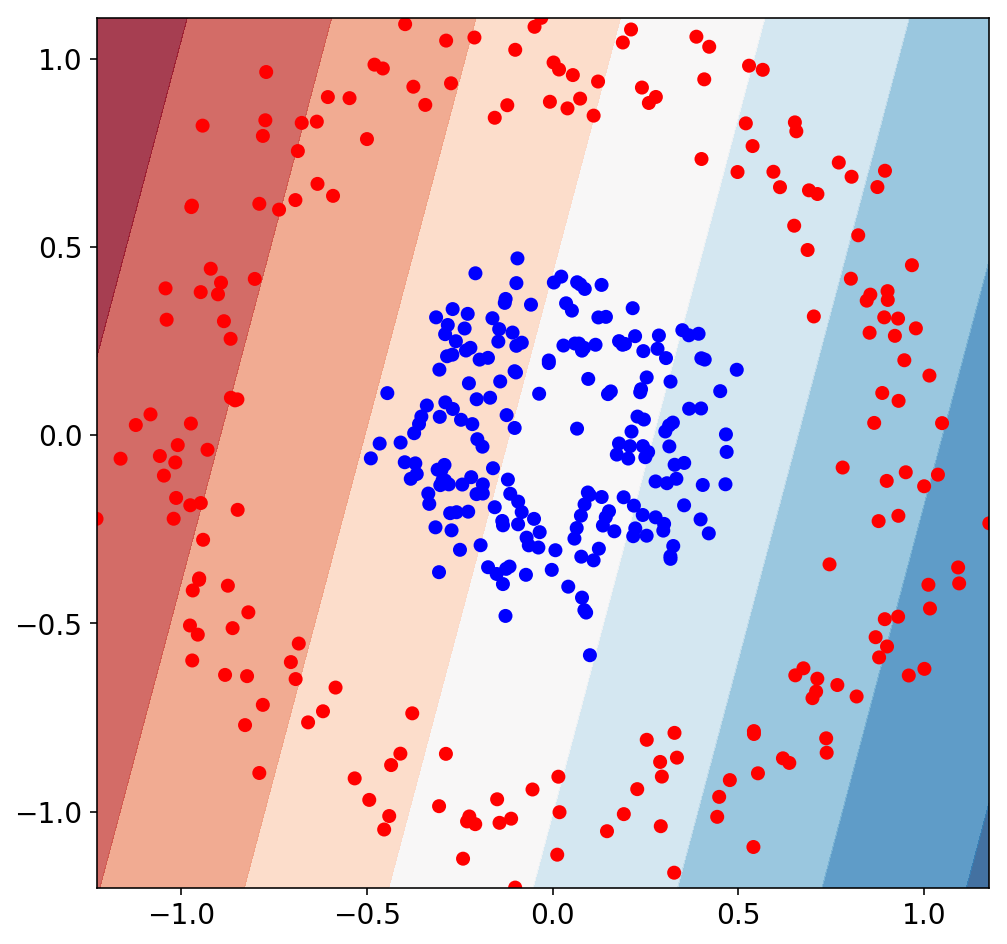

In [130]:
from sklearn.linear_model import LogisticRegression
from utils import plot_surface

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)

lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
print(lr.score(X_train, y_train))
print(lr.score(X_test, y_test))
plot_surface(lr, X, y)


### Think about what method you could use to increase the complexity of a logistic regression model. Visualise the classification accuracy as a function of the model complexity.

In [131]:
# The previous trial did not work since we used a linear regression method.
# One way of improving the method (polynomial regression for circles) is to run a linear regression on "polynomialized" features. 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7)
for p in range(1, 5):
    lr = make_pipeline(PolynomialFeatures(p), LogisticRegression())
    lr.fit(X_train, y_train)
    print('{} Training {}'.format(p, lr.score(X_train, y_train)))
    print('{} Test {}'.format(p, lr.score(X_test, y_test)))

1 Training 0.592857142857
1 Test 0.55
2 Training 1.0
2 Test 1.0
3 Training 1.0
3 Test 1.0
4 Training 1.0
4 Test 1.0


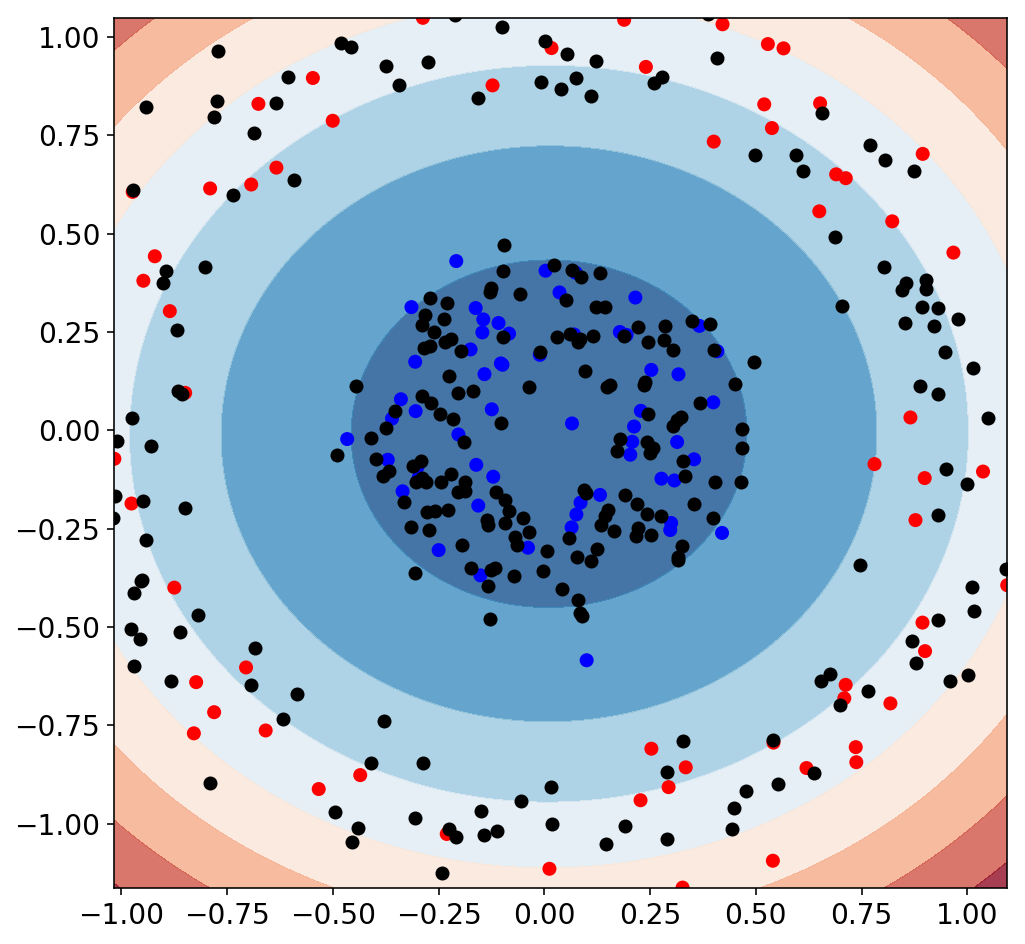

In [151]:
lr = make_pipeline(PolynomialFeatures(2), LogisticRegression())
lr.fit(X_train, y_train)
plt.figure(1)
plot_surface(clf, X_test, y_test, n_steps=500, show=False)
plt.scatter(X_train[:,0], X_train[:,1], c='k')
